# Data Preprocessing and Cleaning Pipeline

This notebook performs comprehensive data engineering tasks on the raw housing dataset. The pipeline includes:

- **Data Loading**: Load raw housing data from CSV files
- **Data Quality Checks**: Identify missing values, duplicates, and outliers
- **Data Type Validation**: Ensure correct data types for each column
- **Column Standardization**: Normalize column names to consistent format
- **Data Cleaning**: Remove invalid records and apply quality filters
- **Data Export**: Save cleaned dataset for downstream analysis

## Step 1: Import Required Libraries

Import necessary libraries for data manipulation, statistical analysis, and visualization.


In [5]:
# Import required libraries for data processing and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization style for consistent plots
sns.set(style="whitegrid")
print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


## Step 2: Load Raw Dataset

Load the raw housing data from the data directory. This step reads the CSV file and provides an initial overview of the dataset structure.

In [6]:
# Load the raw housing dataset from the data directory
print("📥 Loading raw dataset from data directory...")

housing_df = pd.read_csv("../data/raw/house_data.csv")

print("✅ Dataset loaded successfully!")
print(f"Initial data shape: {housing_df.shape[0]} rows, {housing_df.shape[1]} columns")
print("\n🔍 Preview of the first few rows:")
print(housing_df.head())


📥 Loading raw dataset from data directory...
✅ Dataset loaded successfully!
Initial data shape: 84 rows, 7 columns

🔍 Preview of the first few rows:
     price  sqft  bedrooms  bathrooms    location  year_built  condition
0   495000  1527         2        1.5      Suburb        1956       Good
1   752000  2526         3        2.5    Downtown        1998  Excellent
2   319000  1622         2        1.5       Rural        1975       Fair
3  1210000  3102         4        3.0  Waterfront        2005  Excellent
4   462000  1835         2        2.0       Urban        1982       Good


## Step 3: Data Structure Analysis

Examine the dataset structure including data types, memory usage, and identify any missing values. This helps understand the data schema and data quality issues.

In [11]:
# Analyze dataset structure: data types, memory usage, and missing values
print("\n📊 Dataset Information (data types and memory usage):")
print(housing_df.info())

print("\n❓ Missing values per column:")
missing_values = housing_df.isnull().sum()
print(missing_values)

if missing_values.sum() > 0:
    print(f"\n⚠️ Total missing values: {missing_values.sum()}")
else:
    print("\n✅ No missing values detected in the dataset.")



📊 Dataset Information (data types and memory usage):
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 5.2+ KB
None

❓ Missing values per column:
price         0
sqft          0
bedrooms      0
bathrooms     0
location      0
year_built    0
condition     0
dtype: int64

✅ No missing values detected in the dataset.


## Step 4: Data Cleaning - Remove Invalid Records

Remove rows with missing values and apply basic data quality filters to eliminate unrealistic or invalid data points (e.g., negative prices, extremely small square footage).

In [12]:
# Remove rows with missing values
initial_row_count = len(housing_df)
housing_df = housing_df.dropna()
print(f"Removed {initial_row_count - len(housing_df)} rows with missing values.")

# Apply data quality filters
# Filter 1: Remove houses with unrealistic prices (minimum threshold)
MIN_PRICE_THRESHOLD = 10000
housing_df = housing_df[housing_df['price'] > MIN_PRICE_THRESHOLD]
print(f"Removed rows with price <= £{MIN_PRICE_THRESHOLD:,}")

# Filter 2: Remove houses with unrealistic square footage (minimum threshold)
MIN_SQFT_THRESHOLD = 200
housing_df = housing_df[housing_df['sqft'] > MIN_SQFT_THRESHOLD]
print(f"Removed rows with sqft <= {MIN_SQFT_THRESHOLD}")

print(f"\n✅ Final dataset shape after cleaning: {housing_df.shape[0]} rows, {housing_df.shape[1]} columns")

Removed 0 rows with missing values.
Removed rows with price <= £10,000
Removed rows with sqft <= 200

✅ Final dataset shape after cleaning: 84 rows, 7 columns


## Step 5: Column Name Standardization

Standardize column names to follow consistent naming conventions (lowercase with underscores). This improves code readability and prevents issues with case-sensitive operations.

In [13]:
# Standardize column names: remove whitespace, convert to lowercase, replace spaces with underscores
print("\n🧹 Standardizing column names...")
original_columns = housing_df.columns.tolist()

housing_df.columns = housing_df.columns.str.strip().str.lower().str.replace(" ", "_")

print("✅ Column names standardized:")
print(f"Original: {original_columns}")
print(f"Standardized: {housing_df.columns.tolist()}")



🧹 Standardizing column names...
✅ Column names standardized:
Original: ['price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built', 'condition']
Standardized: ['price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built', 'condition']


## Step 6: Statistical Summary

Generate descriptive statistics for all numeric columns. This helps identify potential outliers, understand data distributions, and validate data ranges.

In [14]:
# Generate descriptive statistics for numeric columns
print("\n📈 Statistical Summary of Numeric Columns:")
print(housing_df.describe())

# Additional insights
print(f"\n📊 Key Statistics:")
print(f"  - Total records: {len(housing_df)}")
print(f"  - Numeric columns: {len(housing_df.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"  - Categorical columns: {len(housing_df.select_dtypes(include=['object']).columns)}")



📈 Statistical Summary of Numeric Columns:
              price         sqft   bedrooms  bathrooms   year_built
count  8.400000e+01    84.000000  84.000000  84.000000    84.000000
mean   6.285595e+05  2191.500000   2.857143   2.190476  1982.047619
std    3.591678e+05   650.017117   0.852252   0.828356    19.501563
min    2.490000e+05  1350.000000   2.000000   1.000000  1947.000000
25%    3.742500e+05  1695.000000   2.000000   1.500000  1965.000000
50%    5.110000e+05  1995.000000   3.000000   2.000000  1982.500000
75%    7.292500e+05  2590.000000   3.000000   2.500000  1995.500000
max    1.680000e+06  3850.000000   5.000000   4.500000  2019.000000

📊 Key Statistics:
  - Total records: 84
  - Numeric columns: 5
  - Categorical columns: 2


## Step 7: Data Distribution Visualization

Visualize the distribution of key numeric variables to understand data patterns, identify skewness, and detect potential outliers visually.


📊 Generating price distribution visualization...


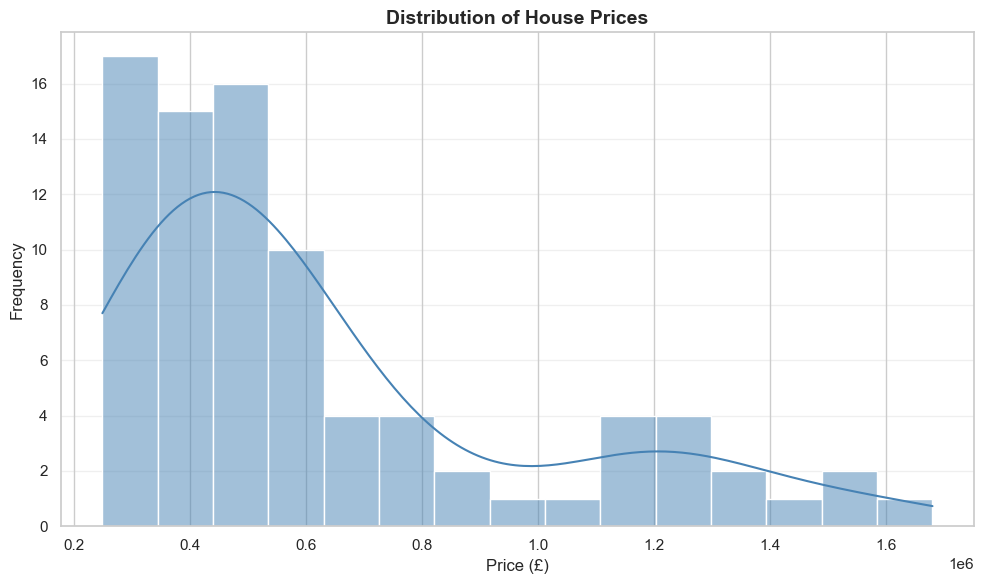

✅ Price distribution visualization completed.


In [15]:
# Visualize the distribution of house prices
print("\n📊 Generating price distribution visualization...")

plt.figure(figsize=(10, 6))
sns.histplot(housing_df["price"], kde=True, bins=15, color='steelblue')
plt.title("Distribution of House Prices", fontsize=14, fontweight='bold')
plt.xlabel("Price (£)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Price distribution visualization completed.")


## Step 8: Data Validation - Check for Invalid Values

Systematically check numeric columns for invalid values such as negative numbers, which would be unrealistic for housing data (e.g., negative prices, square footage, or years).

In [17]:
# Validate numeric columns for invalid values (negative numbers)
print("\n🔍 Validating numeric columns for invalid values...")

numeric_columns = ['price', 'sqft', 'bedrooms', 'bathrooms', 'year_built']
validation_passed = True

for column_name in numeric_columns:
    if column_name in housing_df.columns:
        invalid_records = housing_df[housing_df[column_name] < 0]
        if not invalid_records.empty:
            print(f"⚠️ Found {len(invalid_records)} negative values in '{column_name}':")
            print(invalid_records[[column_name]])
            validation_passed = False
        else:
            print(f"✅ No negative values found in '{column_name}'.")

if validation_passed:
    print("\n✅ All numeric columns passed validation checks.")
else:
    print("\n⚠️ Some columns contain invalid values that may need attention.")



🔍 Validating numeric columns for invalid values...
✅ No negative values found in 'price'.
✅ No negative values found in 'sqft'.
✅ No negative values found in 'bedrooms'.
✅ No negative values found in 'bathrooms'.
✅ No negative values found in 'year_built'.

✅ All numeric columns passed validation checks.


## Step 9: Duplicate Detection and Removal

Identify and remove duplicate records to ensure data uniqueness and prevent bias in downstream analysis.

In [18]:
# Check for and remove duplicate rows
print("\n🧹 Checking for duplicate rows...")

duplicate_count = housing_df.duplicated().sum()
print(f"Found {duplicate_count} duplicate row(s).")

if duplicate_count > 0:
    print(f"⚠️ Removing {duplicate_count} duplicate row(s)...")
    rows_before = len(housing_df)
    housing_df = housing_df.drop_duplicates()
    rows_after = len(housing_df)
    print(f"✅ Removed {rows_before - rows_after} duplicate row(s).")
    print(f"   Dataset now contains {rows_after} unique records.")
else:
    print("✅ No duplicate rows found. All records are unique.")



🧹 Checking for duplicate rows...
Found 0 duplicate row(s).
✅ No duplicate rows found. All records are unique.


## Step 10: Export Cleaned Dataset

Save the cleaned and processed dataset to the processed data directory for use in subsequent analysis and modeling steps.

In [19]:
# Export the cleaned dataset to the processed data directory
print("\n💾 Exporting cleaned dataset...")

output_filepath = "../data/processed/cleaned_house_data.csv"
housing_df.to_csv(output_filepath, index=False)

print(f"✅ Cleaned dataset successfully saved to: {output_filepath}")
print(f"   Final dataset contains {len(housing_df)} records with {len(housing_df.columns)} columns.")
print("\n✅ Data preprocessing pipeline completed successfully!")



💾 Exporting cleaned dataset...
✅ Cleaned dataset successfully saved to: ../data/processed/cleaned_house_data.csv
   Final dataset contains 84 records with 7 columns.

✅ Data preprocessing pipeline completed successfully!


In [20]:
# Display final dataset summary
print("\n" + "="*60)
print("FINAL DATASET SUMMARY")
print("="*60)
print(f"\nDataset Shape: {housing_df.shape[0]} rows × {housing_df.shape[1]} columns")
print(f"\nColumn Names:")
for idx, col in enumerate(housing_df.columns, 1):
    print(f"  {idx}. {col}")
print(f"\nData Types:")
print(housing_df.dtypes)
print("\n" + "="*60)



FINAL DATASET SUMMARY

Dataset Shape: 84 rows × 7 columns

Column Names:
  1. price
  2. sqft
  3. bedrooms
  4. bathrooms
  5. location
  6. year_built
  7. condition

Data Types:
price           int64
sqft            int64
bedrooms        int64
bathrooms     float64
location       object
year_built      int64
condition      object
dtype: object

